## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [49]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [50]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('./Resources/bitstamp.csv'),
    index_col='Timestamp',
    parse_dates=True,
    infer_datetime_format=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [51]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
bitstamp.sort_index()
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [52]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase =  pd.read_csv(
    Path('./Resources/coinbase.csv'),
    index_col='Timestamp',
    parse_dates=True,
    infer_datetime_format=True
)

In [53]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
coinbase.sort_index()
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [54]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# YOUR CODE HERE
display(bitstamp.isnull().sum())
bitstamp.dropna(inplace=True)
bitstamp.head()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [55]:
# Use the str.replace function to remove the dollar sign, $
# YOUR CODE HERE
bitstamp['Close'] = bitstamp['Close'].str.replace('$','')
bitstamp.head()

C:\Users\Pravin\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [56]:
# Convert the Close data type to a float
# YOUR CODE HERE
display(bitstamp['Close'].dtypes)
bitstamp['Close']= bitstamp['Close'].astype('float')
bitstamp['Close'].dtypes

dtype('O')

dtype('float64')

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [57]:
# Review the data for duplicate values, and drop them if necessary
# YOUR CODE HERE
display(bitstamp.duplicated().sum()>0)
bitstamp.drop_duplicates()

False

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [58]:
# Repeat Steps 1–4 for the coinbase DataFrame
# YOUR CODE HERE
# replace or drop all NaNs
display(coinbase.isnull().sum())
coinbase.dropna()

# replace $ in Close column
coinbase['Close'] = coinbase['Close'].str.replace('$','')
display(coinbase.head())

# change dataype to float for Close column
coinbase['Close']= coinbase['Close'].astype('float')
display(coinbase['Close'].dtypes)

# remove any duplicates
display(coinbase.duplicated().sum()>0)
coinbase.drop_duplicates()

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

C:\Users\Pravin\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


dtype('float64')

True

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.00,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747


In [59]:
display('Data source suggests price data from January 2018 till March 2018 i.e. 3 month of data series')

'Data source suggests price data from January 2018 till March 2018 i.e. 3 month of data series'

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [60]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp['Close'].loc['2018-01-01' : '2018-12-31']

# Review the first five rows of the DataFrame
# YOUR CODE HERE
bitstamp_sliced.head(5)

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [61]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase['Close'].loc['2018-01-01' : '2018-12-31']

# Review the first five rows of the DataFrame
# YOUR CODE HERE
coinbase_sliced.head(5)

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [62]:
# Generate the summary statistics for the bitstamp DataFrame
# YOUR CODE HERE
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [63]:
# Generate the summary statistics for the coinbase DataFrame
# YOUR CODE HERE
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Difference Bitstamp vs CoinBase BTC prices'}, xlabel='Timestamp'>

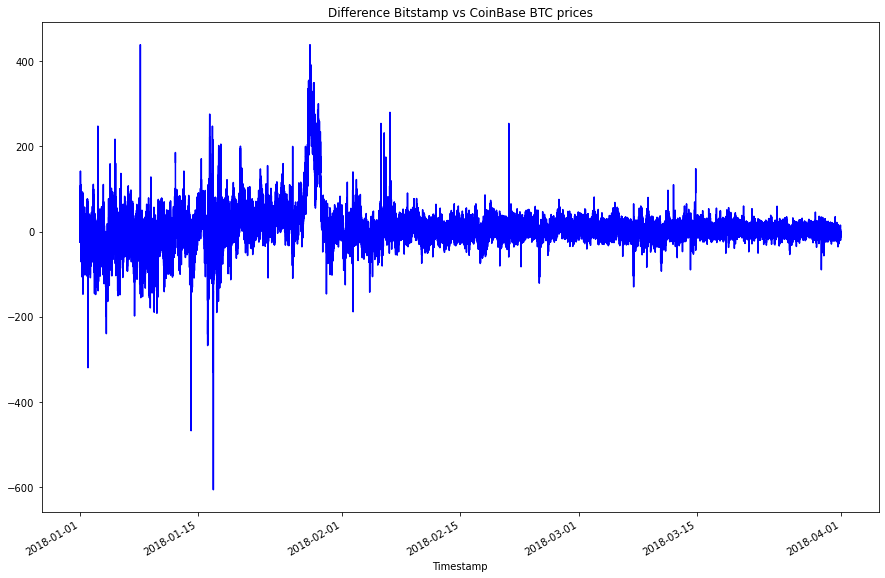

In [64]:
diff_df = (bitstamp_sliced - coinbase_sliced)
diff_df.plot(figsize=(15,10),color='blue', title='Difference Bitstamp vs CoinBase BTC prices')

In [65]:
display('Above chart suggests that BTC prices on BitStamp and CoinBase index deviated during the given period, creating arbitrage opportunities.')

'Above chart suggests that BTC prices on BitStamp and CoinBase index deviated during the given period, creating arbitrage opportunities.'

In [70]:
indicator = (((diff_df>0).sum()/(diff_df<0).sum()))*100
display(f'Ratio of times when Bitstamp BTC prices are higher than CoinBase BTC prices vs other way round is {round(indicator)} %')
display('That means there are more arbitrage opportunities where trader buys BTC from CoinBase and sells at BitStamp to make profit.')

'Ratio of times when Bitstamp BTC prices are higher than CoinBase BTC prices vs other way round is 168 %'

'That means there are more arbitrage opportunities where trader buys BTC from CoinBase and sells at BitStamp to make profit.'

<AxesSubplot:title={'center':'Bitcoin prices on BitStamp'}, xlabel='Timestamp'>

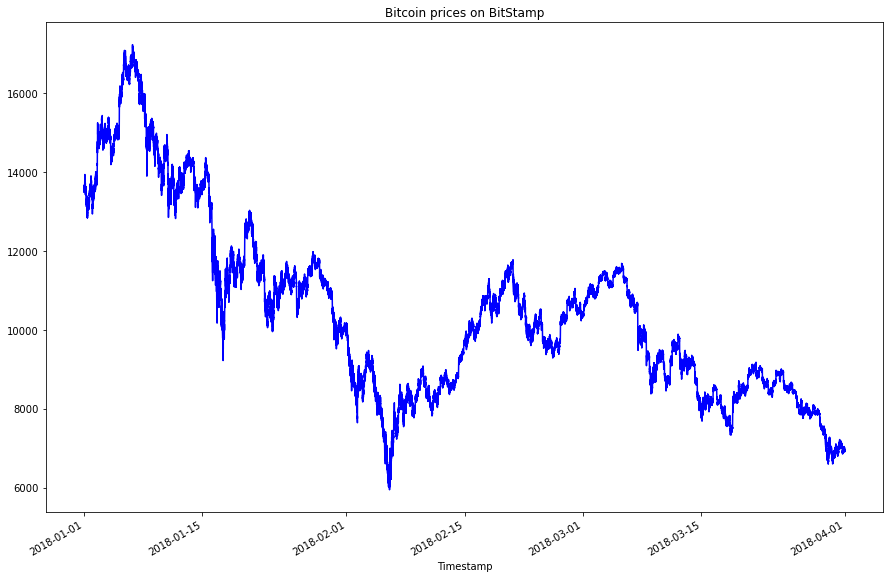

In [71]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
bitstamp['Close'].plot(figsize=(15,10), title='Bitcoin prices on BitStamp', color='blue')

<AxesSubplot:title={'center':'Bitcoin prices on CoinBase'}, xlabel='Timestamp'>

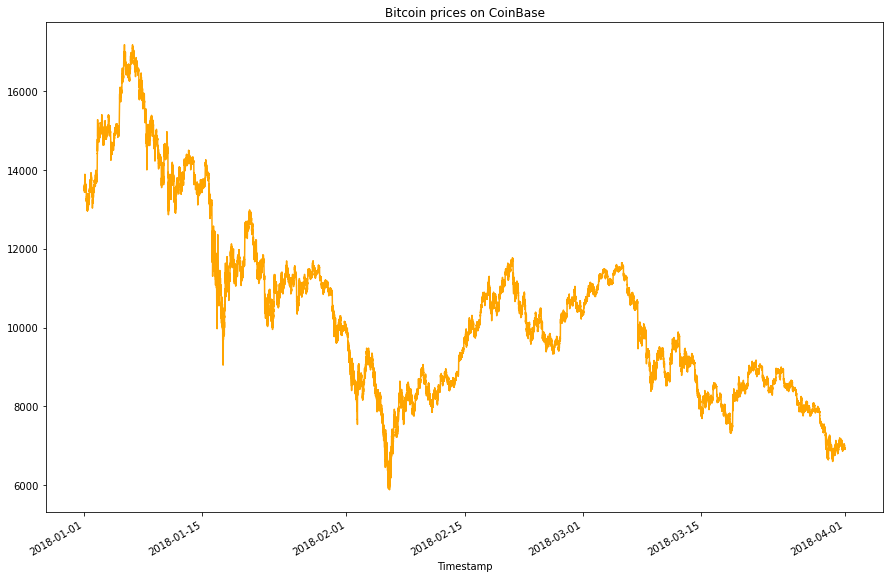

In [72]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
coinbase['Close'].plot(figsize=(15,10), title='Bitcoin prices on CoinBase', color='orange')

<AxesSubplot:title={'center':'Bitcoin prices BitStamp vs CoinBase'}, xlabel='Timestamp'>

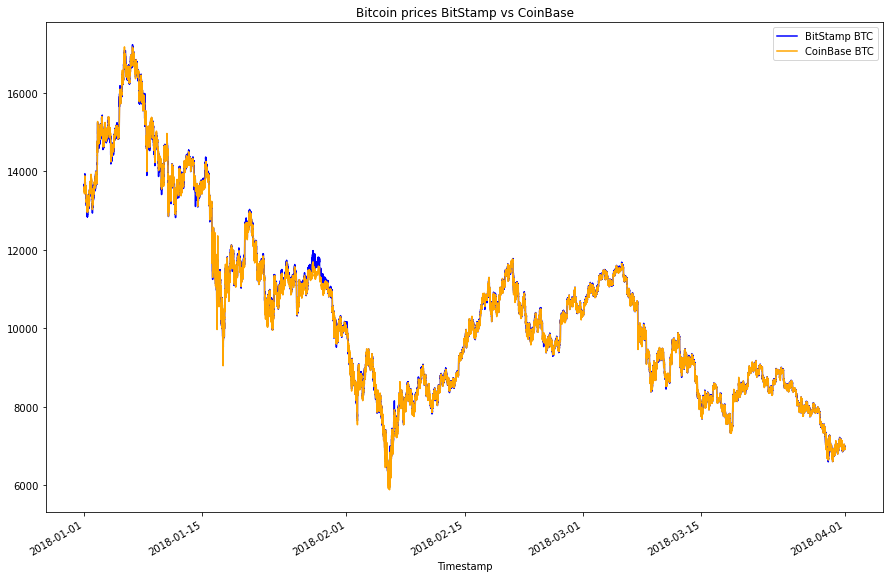

In [73]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
bitstamp['Close'].plot(legend=True, figsize=(15,10), title='Bitcoin prices BitStamp vs CoinBase', color='blue', label='BitStamp BTC')
coinbase['Close'].plot(legend=True, figsize=(15,10), color='orange', label='CoinBase BTC')

In [77]:
display('Overlay visualtization suggests there are price differences across two exchanges i.e. presence of arbitrage.')

'Overlay visualtization suggests there are price differences across two exchanges i.e. presence of arbitrage.'

<AxesSubplot:title={'center':'Bitcoin prices BitStamp vs CoinBase for Jan 2018'}, xlabel='Timestamp'>

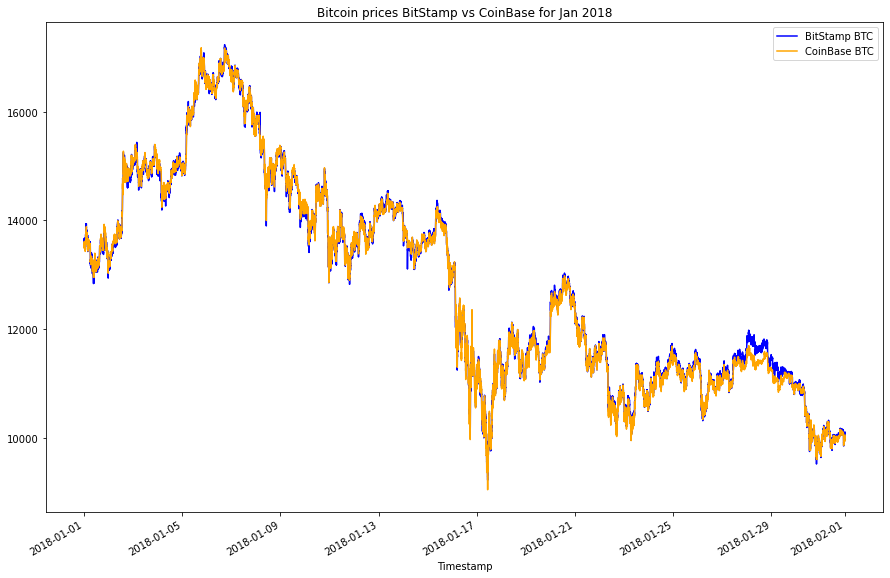

In [78]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
bitstamp['Close'].loc['2018-01-01':'2018-01-31'].plot(legend=True, figsize=(15,10), title='Bitcoin prices BitStamp vs CoinBase for Jan 2018', color='blue', label='BitStamp BTC')
coinbase['Close'].loc['2018-01-01':'2018-01-31'].plot(legend=True, figsize=(15,10), color='orange', label='CoinBase BTC')

<AxesSubplot:title={'center':'Bitcoin prices BitStamp vs CoinBase for Jan 25-30, 2018'}, xlabel='Timestamp'>

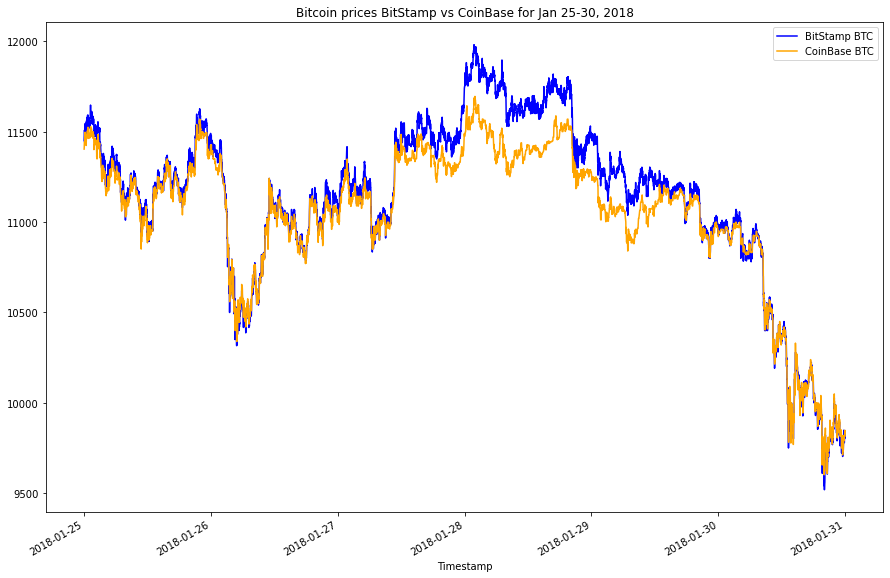

In [79]:
# focus on 25th Jan to 30th Jan to see material price deviations
bitstamp['Close'].loc['2018-01-25':'2018-01-30'].plot(legend=True, figsize=(15,10), title='Bitcoin prices BitStamp vs CoinBase for Jan 25-30, 2018', color='blue', label='BitStamp BTC')
coinbase['Close'].loc['2018-01-25':'2018-01-30'].plot(legend=True, figsize=(15,10), color='orange', label='CoinBase BTC')

In [80]:
display('Based on observation, it looks like price deviations were most material on 28th Jan and 29th Jan during January month.')
display('That means the profit margins would be higher for arbitrage trades on 28th and 29th Jan during the January month.')

'Based on observation, it looks like price deviations were most material on 28th Jan and 29th Jan during January month.'

'That means the profit margins would be higher for arbitrage trades on 28th and 29th Jan during the January month.'

<AxesSubplot:title={'center':'Bitcoin prices BitStamp vs CoinBase  for Feb 2018'}, xlabel='Timestamp'>

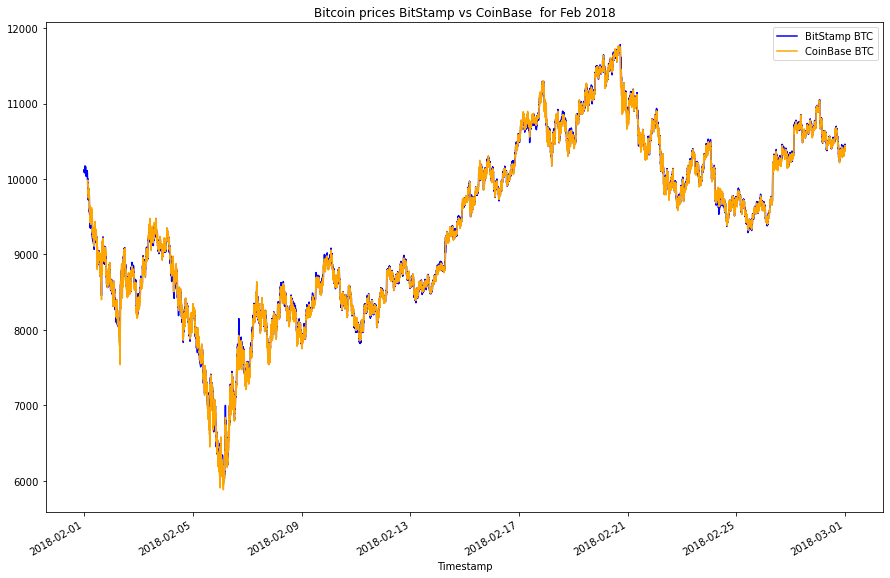

In [81]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
# YOUR CODE HERE
bitstamp['Close'].loc['2018-02-01':'2018-02-28'].plot(legend=True, figsize=(15,10), title='Bitcoin prices BitStamp vs CoinBase  for Feb 2018', color='blue', label='BitStamp BTC')
coinbase['Close'].loc['2018-02-01':'2018-02-28'].plot(legend=True, figsize=(15,10), color='orange', label='CoinBase BTC')

<AxesSubplot:title={'center':'Bitcoin prices BitStamp vs CoinBase  for Mar 2018'}, xlabel='Timestamp'>

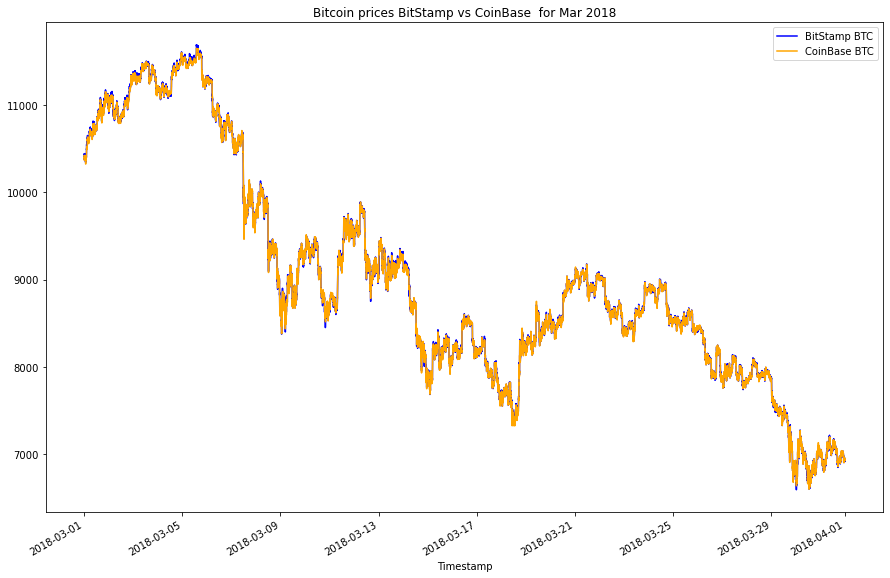

In [82]:
# visulation of later period
bitstamp['Close'].loc['2018-03-01':'2018-03-31'].plot(legend=True, figsize=(15,10), title='Bitcoin prices BitStamp vs CoinBase  for Mar 2018', color='blue', label='BitStamp BTC')
coinbase['Close'].loc['2018-03-01':'2018-03-31'].plot(legend=True, figsize=(15,10), color='orange', label='CoinBase BTC')

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer**  
As time progressed, the spreads seem to have lowered. This could be result of the fact that over the period of time, arbitrage opportunities diminish as more participants take advantage of arbitrage possibilities. 
Additionally,
1. Spreads were much higher in last week of January (specially 28th and 29th Jan) compared to other periods.
2. Bitstamp prices were higher than coinbase prices on more instances than other way around

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitcoin prices BitStamp vs CoinBase for 28th Jan 2018'}, xlabel='Timestamp'>

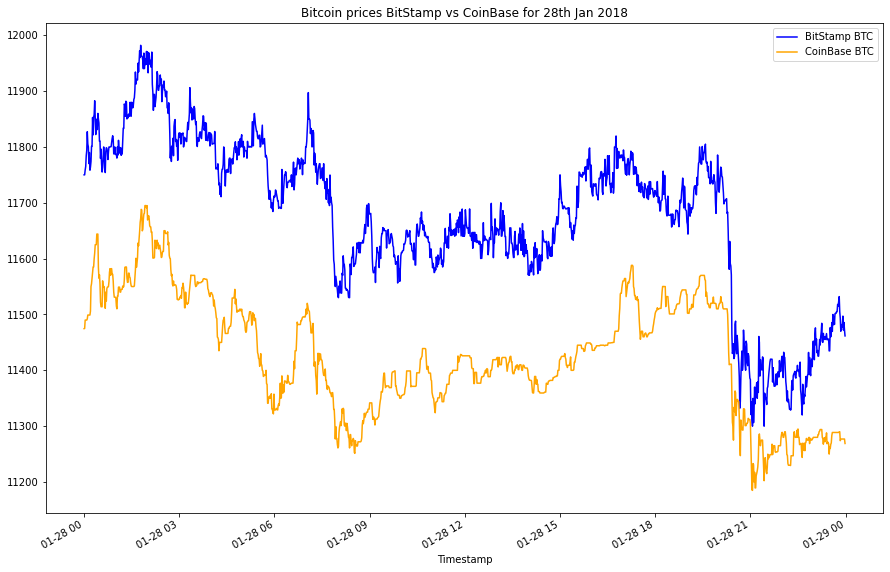

In [83]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
bitstamp['Close'].loc['2018-01-28'].plot(legend=True, figsize=(15,10), title='Bitcoin prices BitStamp vs CoinBase for 28th Jan 2018', color='blue', label='BitStamp BTC')
coinbase['Close'].loc['2018-01-28'].plot(legend=True, figsize=(15,10), color='orange', label='CoinBase BTC')

In [84]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp['Close'].loc['2018-01-28'] - coinbase['Close'].loc['2018-01-28']

# Generate summary statistics for the early DataFrame
# YOUR CODE HERE
arbitrage_spread_early.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:>

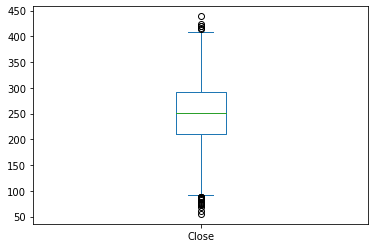

In [85]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_early.plot(kind='box')

<AxesSubplot:title={'center':'Bitcoin prices BitStamp vs CoinBase for 21st Feb 2018'}, xlabel='Timestamp'>

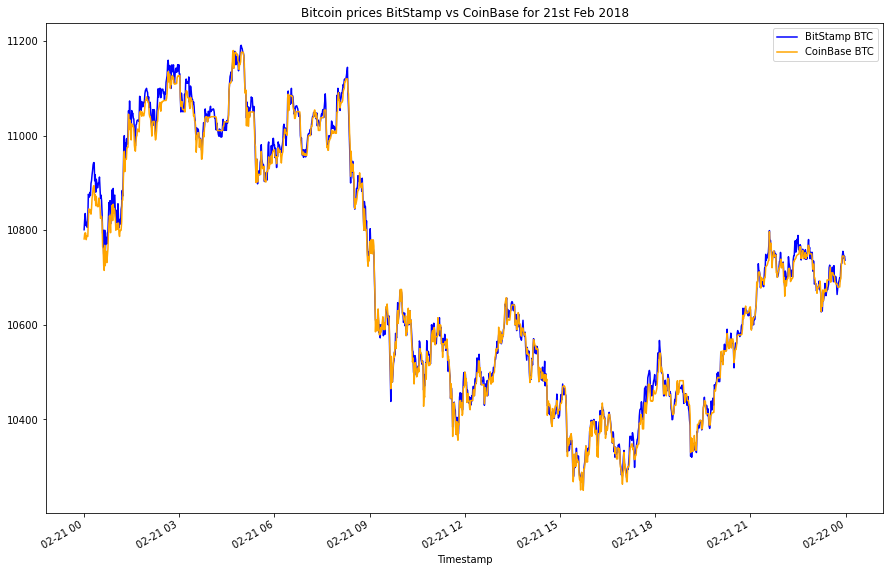

In [86]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
bitstamp['Close'].loc['2018-02-21'].plot(legend=True, figsize=(15,10), title='Bitcoin prices BitStamp vs CoinBase for 21st Feb 2018', color='blue', label='BitStamp BTC')
coinbase['Close'].loc['2018-02-21'].plot(legend=True, figsize=(15,10), color='orange', label='CoinBase BTC')

In [87]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp['Close'].loc['2018-02-21'] - coinbase['Close'].loc['2018-02-21']

# Generate summary statistics 
# YOUR CODE HERE
arbitrage_spread_middle.describe()

count    1438.000000
mean        7.654729
std        14.918266
min       -36.330000
25%        -2.377500
50%         6.955000
75%        17.007500
max        65.000000
Name: Close, dtype: float64

<AxesSubplot:>

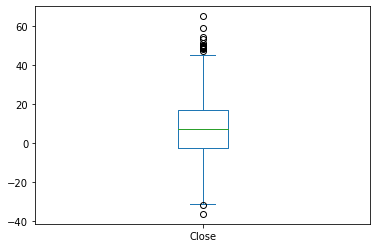

In [88]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_middle.plot(kind='box')

<AxesSubplot:title={'center':'Bitcoin prices BitStamp vs CoinBase for 13th Mar 2018'}, xlabel='Timestamp'>

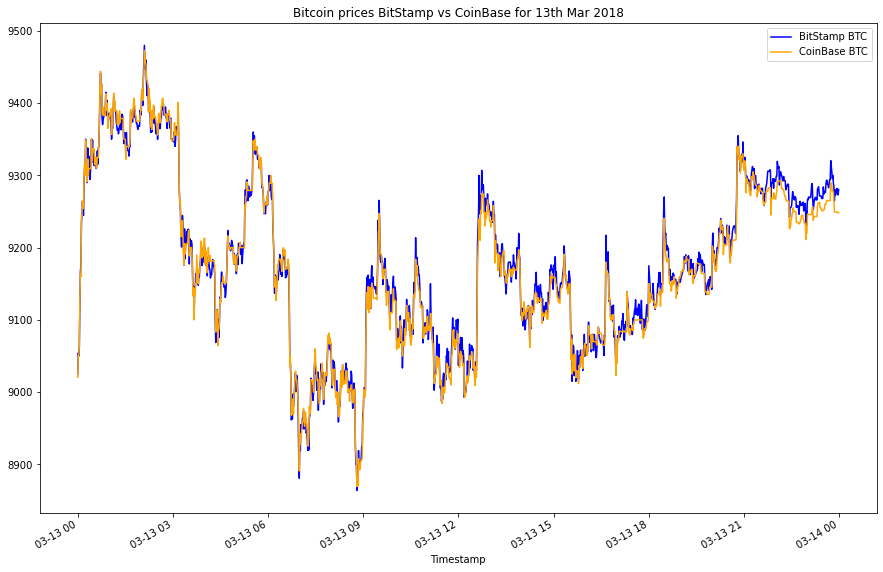

In [89]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
bitstamp['Close'].loc['2018-03-13'].plot(legend=True, figsize=(15,10), title='Bitcoin prices BitStamp vs CoinBase for 13th Mar 2018', color='blue', label='BitStamp BTC')
coinbase['Close'].loc['2018-03-13'].plot(legend=True, figsize=(15,10), color='orange', label='CoinBase BTC')

In [90]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp['Close'].loc['2018-03-13'] - coinbase['Close'].loc['2018-03-13']

# Generate summary statistics for the late DataFrame
# YOUR CODE HERE
arbitrage_spread_late.describe()

count    1423.000000
mean        5.111145
std        12.253619
min       -47.270000
25%        -3.095000
50%         4.660000
75%        13.365000
max        65.000000
Name: Close, dtype: float64

<AxesSubplot:>

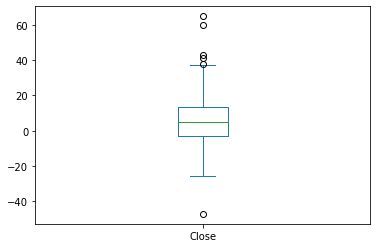

In [91]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_late.plot(kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [92]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp['Close'].loc['2018-01-28'] - coinbase['Close'].loc['2018-01-28']
arbitrage_spread_middle = bitstamp['Close'].loc['2018-02-21'] - coinbase['Close'].loc['2018-02-21']
arbitrage_spread_late = bitstamp['Close'].loc['2018-03-13'] - coinbase['Close'].loc['2018-03-13']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE
display('Early positive spreads', arbitrage_spread_early[arbitrage_spread_early>0].describe())
display('Middle positive spreads', arbitrage_spread_middle[arbitrage_spread_middle>0].describe())
display('Late positive spreads', arbitrage_spread_late[arbitrage_spread_late>0].describe())

'Early positive spreads'

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

'Middle positive spreads'

count    983.000000
mean      15.161343
std       11.253371
min        0.010000
25%        6.190000
50%       12.480000
75%       21.140000
max       65.000000
Name: Close, dtype: float64

'Late positive spreads'

count    930.000000
mean      11.922226
std        8.680349
min        0.010000
25%        4.992500
50%       10.785000
75%       17.285000
max       65.000000
Name: Close, dtype: float64

In [94]:
display('Positive spreads are much higher in early period i.e. in Jan month. Positive spreads diminish in Feb and even further in the month of March.')

'Positive spreads are much higher in early period i.e. in Jan month. Positive spreads diminish in Feb and even further in the month of March.'

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [95]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0]/coinbase['Close'].loc['2018-01-28']
spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle>0]/coinbase['Close'].loc['2018-02-21']
spread_return_late= arbitrage_spread_late[arbitrage_spread_late>0]/coinbase['Close'].loc['2018-03-13']

# Review the spread return DataFrame
# YOUR CODE HERE
display('Spread returns from early period selected date are: ',spread_return_early.describe())
display('Spread returns from middle period selected date are: ',spread_return_middle.describe())
display('Spread returns from late period selected date are: ',spread_return_late.describe())

'Spread returns from early period selected date are: '

count    1436.000000
mean        0.021648
std         0.005961
min         0.004885
25%         0.018369
50%         0.021897
75%         0.025292
max         0.038510
Name: Close, dtype: float64

'Spread returns from middle period selected date are: '

count    9.830000e+02
mean     1.409552e-03
std      1.039896e-03
min      9.049782e-07
25%      5.729958e-04
50%      1.163479e-03
75%      1.944676e-03
max      5.999631e-03
Name: Close, dtype: float64

'Spread returns from late period selected date are: '

count    930.000000
mean       0.001300
std        0.000944
min        0.000001
25%        0.000545
50%        0.001179
75%        0.001886
max        0.007077
Name: Close, dtype: float64

In [96]:
display('Spread Returns are less than 1% for Feb and March.')

'Spread Returns are less than 1% for Feb and March.'

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [97]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early>0.01]
profitable_trades_middle = spread_return_middle[spread_return_middle>0.01]
profitable_trades_late = spread_return_late[spread_return_late>0.01]

# Review the first five profitable trades
# YOUR CODE HERE
display(profitable_trades_early.head())
display(profitable_trades_middle.head())
display(profitable_trades_late.head())

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

Series([], Name: Close, dtype: float64)

Series([], Name: Close, dtype: float64)

In [98]:
display('There are no profitable trades for middle period date and late period date')

'There are no profitable trades for middle period date and late period date'

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [99]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE
display('Summary for profitable trades in early date is:', profitable_trades_early.describe())
display('Summary for profitable trades in middle date is:', profitable_trades_middle.describe())
display('Summary for profitable trades in late date is:', profitable_trades_late.describe())

'Summary for profitable trades in early date is:'

count    1378.000000
mean        0.022201
std         0.005421
min         0.010087
25%         0.019016
50%         0.022191
75%         0.025413
max         0.038510
Name: Close, dtype: float64

'Summary for profitable trades in middle date is:'

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

'Summary for profitable trades in late date is:'

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [100]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early*coinbase['Close'].loc['2018-01-28']

display('Did not perform similar operation for middle and late dates as there were no profitables trades for those dates')

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
# YOUR CODE HERE
display("'Profit per trade' for trades in early date is:",profit_per_trade_early)

'Did not perform similar operation for middle and late dates as there were no profitables trades for those dates'

"'Profit per trade' for trades in early date is:"

Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
                        ...  
2018-01-28 23:55:00    220.10
2018-01-28 23:56:00    195.11
2018-01-28 23:57:00    208.74
2018-01-28 23:58:00    195.12
2018-01-28 23:59:00    192.63
Name: Close, Length: 1378, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [101]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_early.describe()

count    1378.000000
mean      253.931996
std        62.057953
min       113.970000
25%       217.272500
50%       254.150000
75%       292.987500
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Early profit per trade'}, xlabel='Timestamp'>

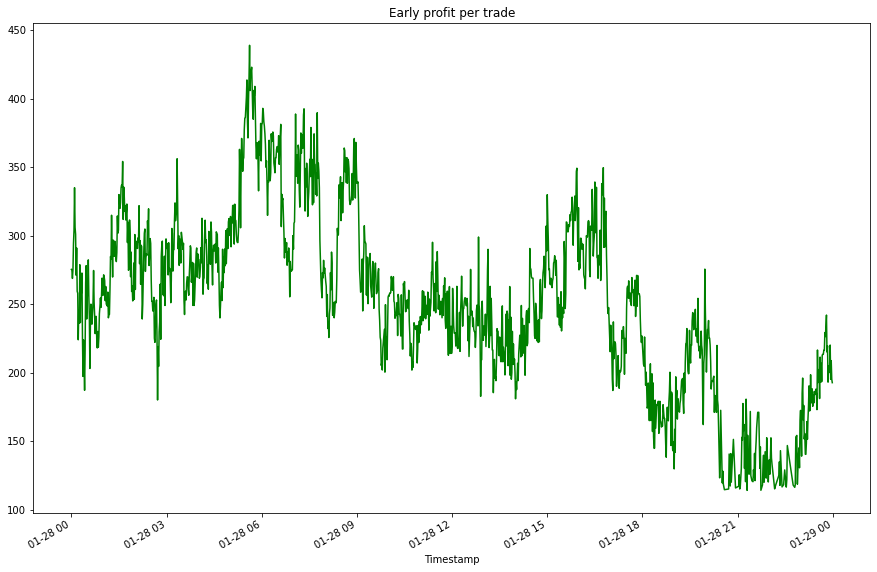

In [102]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_early.plot(figsize=(15,10), title='Early profit per trade', color='green')

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [104]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE
display('Potential profit in Jan month is : $ ', round(profit_per_trade_early.sum()))

'Potential profit in Jan month is : $ '

349918

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [105]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

In [107]:
display('Profit buildup during Jan month from arbitrage trades will be as follows:')

'Profit buildup during Jan month from arbitrage trades will be as follows:'

<AxesSubplot:title={'center':'cumulative sum of profits for the early profit per trade'}, xlabel='Timestamp'>

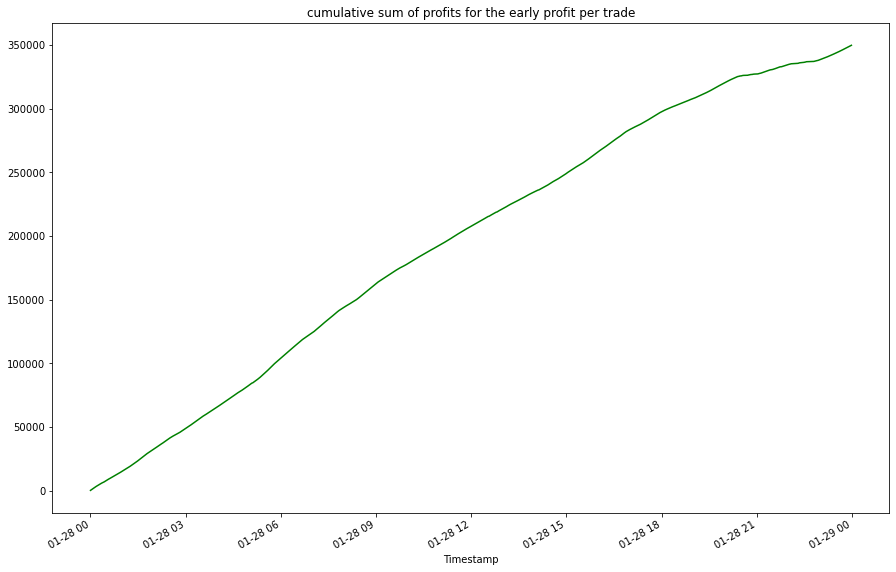

In [106]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE
cumulative_profit_early.plot(figsize=(15,10), title='cumulative sum of profits for the early profit per trade', color='green')

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Since spreads were higher in early period selected date, we find profitable trades for that date. However in later periods, as spreads diminish, incorporating transaction cost of 1%, there were no profitable trades i.e. no arbritrage opportunity exist for the 'selected dates' in middle and late period. 